# CSCI E-25      
## Independent Project - Fashion Classifier
### Alonzo Machiraju

## Introduction   

This project aims to classify photos of pieces of clothing and analyze their colors, patterns and textures.

The first stage requires importing all relevant packages

In [1]:
import tensorflow as tf
import tensorflow.keras as keras
import numpy as np
import matplotlib.pyplot as plt

# IMG_SIZE is determined by ResNet50V2 model choice
IMG_SIZE = 224
BATCH_SIZE = 1024

In [2]:
print(tf.__version__)

2.12.0


In [3]:
gpu = len(tf.config.list_physical_devices('GPU'))>0
print("GPU is", "available" if gpu else "NOT AVAILABLE")

GPU is available


Having verified our TensorFlow version, we can now load the Fashion-MNIST dataset, build a classifer, and train it.

In [4]:
fmnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fmnist.load_data()

In [5]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

We have ten classes in the dataset. However, the names are not stored in the dataset, but instead correspond to a numerical label 0-9.

In [6]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

Before building and training our classifier, we must explore the data.

In [7]:
train_images.shape

(60000, 28, 28)

Our training data consists of 60,000 images of 28x28 pixels.

In [8]:
test_images.shape

(10000, 28, 28)

Our test set is much smaller, containing 10,000 images of 28x28 pixels. We will now view a small sample of our fashion images for both our train and test data:

Training Images:


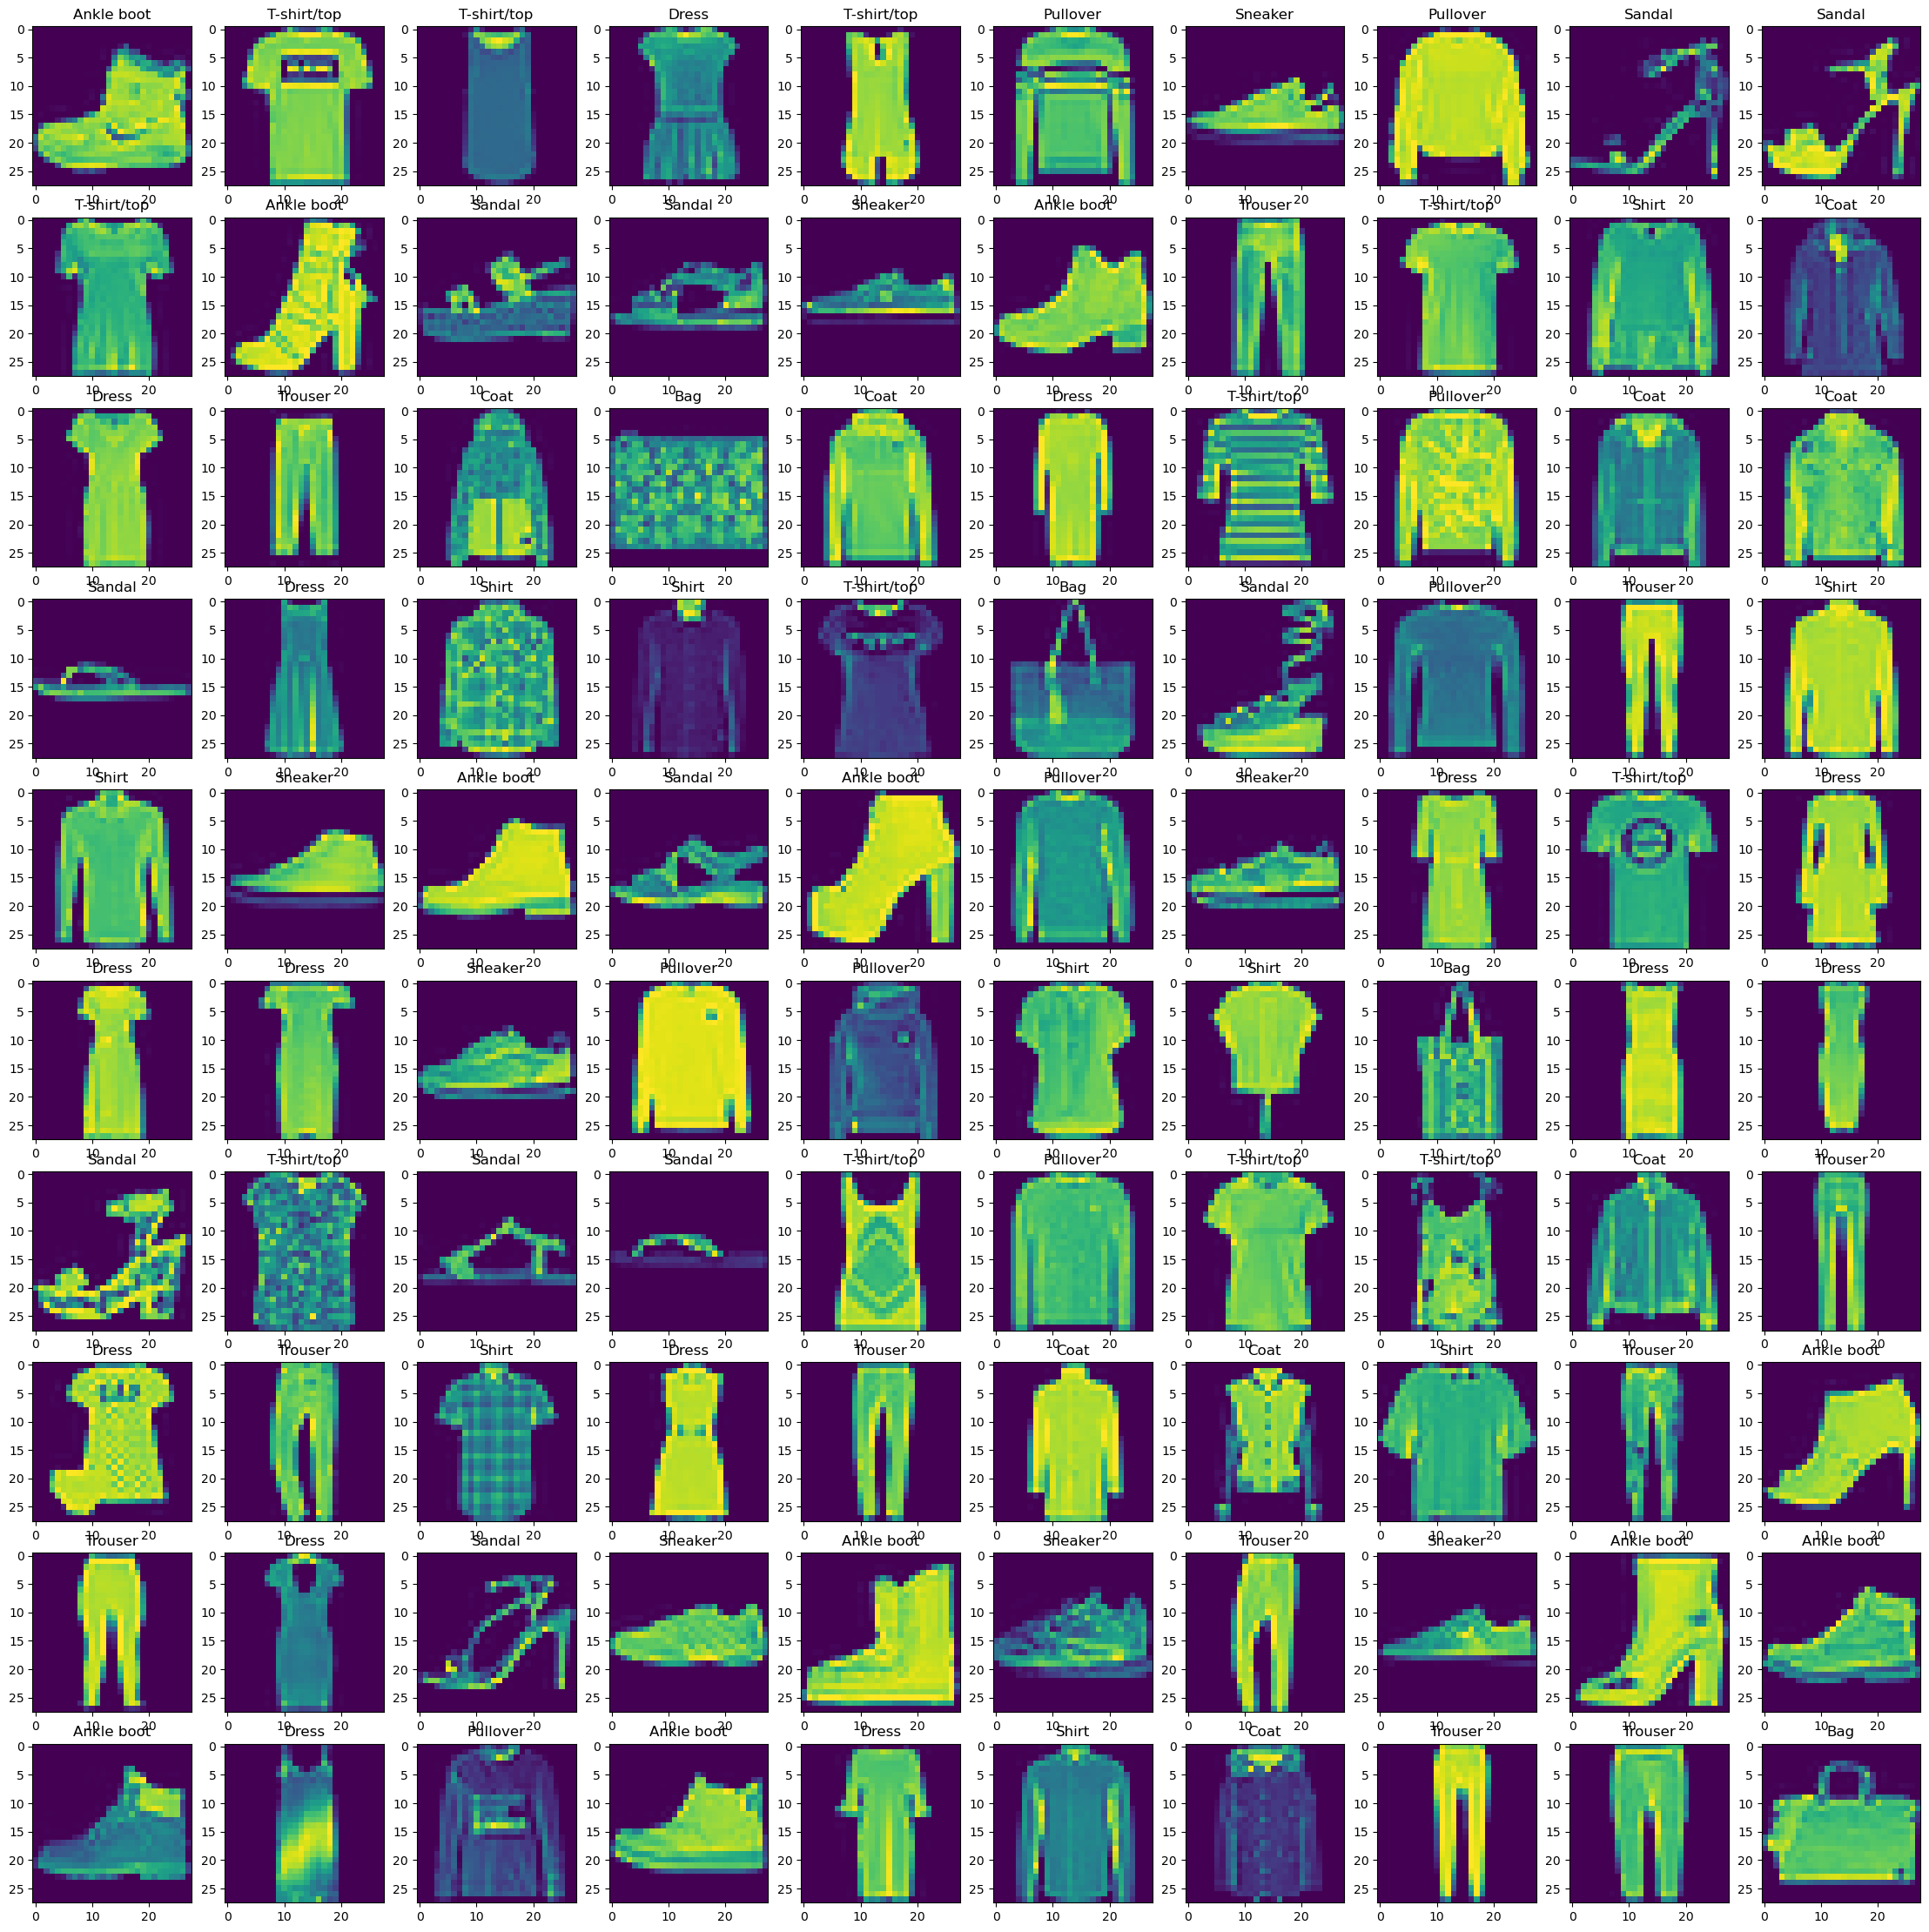

In [9]:
fig, ax = plt.subplots(10, 10, figsize=(28,28))
ax = ax.flatten()

print("Training Images:")

for i in range(0, 100):
        img = train_images[i]
        if img is None:
            continue
            
        label = class_names[train_labels[i]]
        ax[i].imshow(img)
        ax[i].set_title(label)

Test Images:


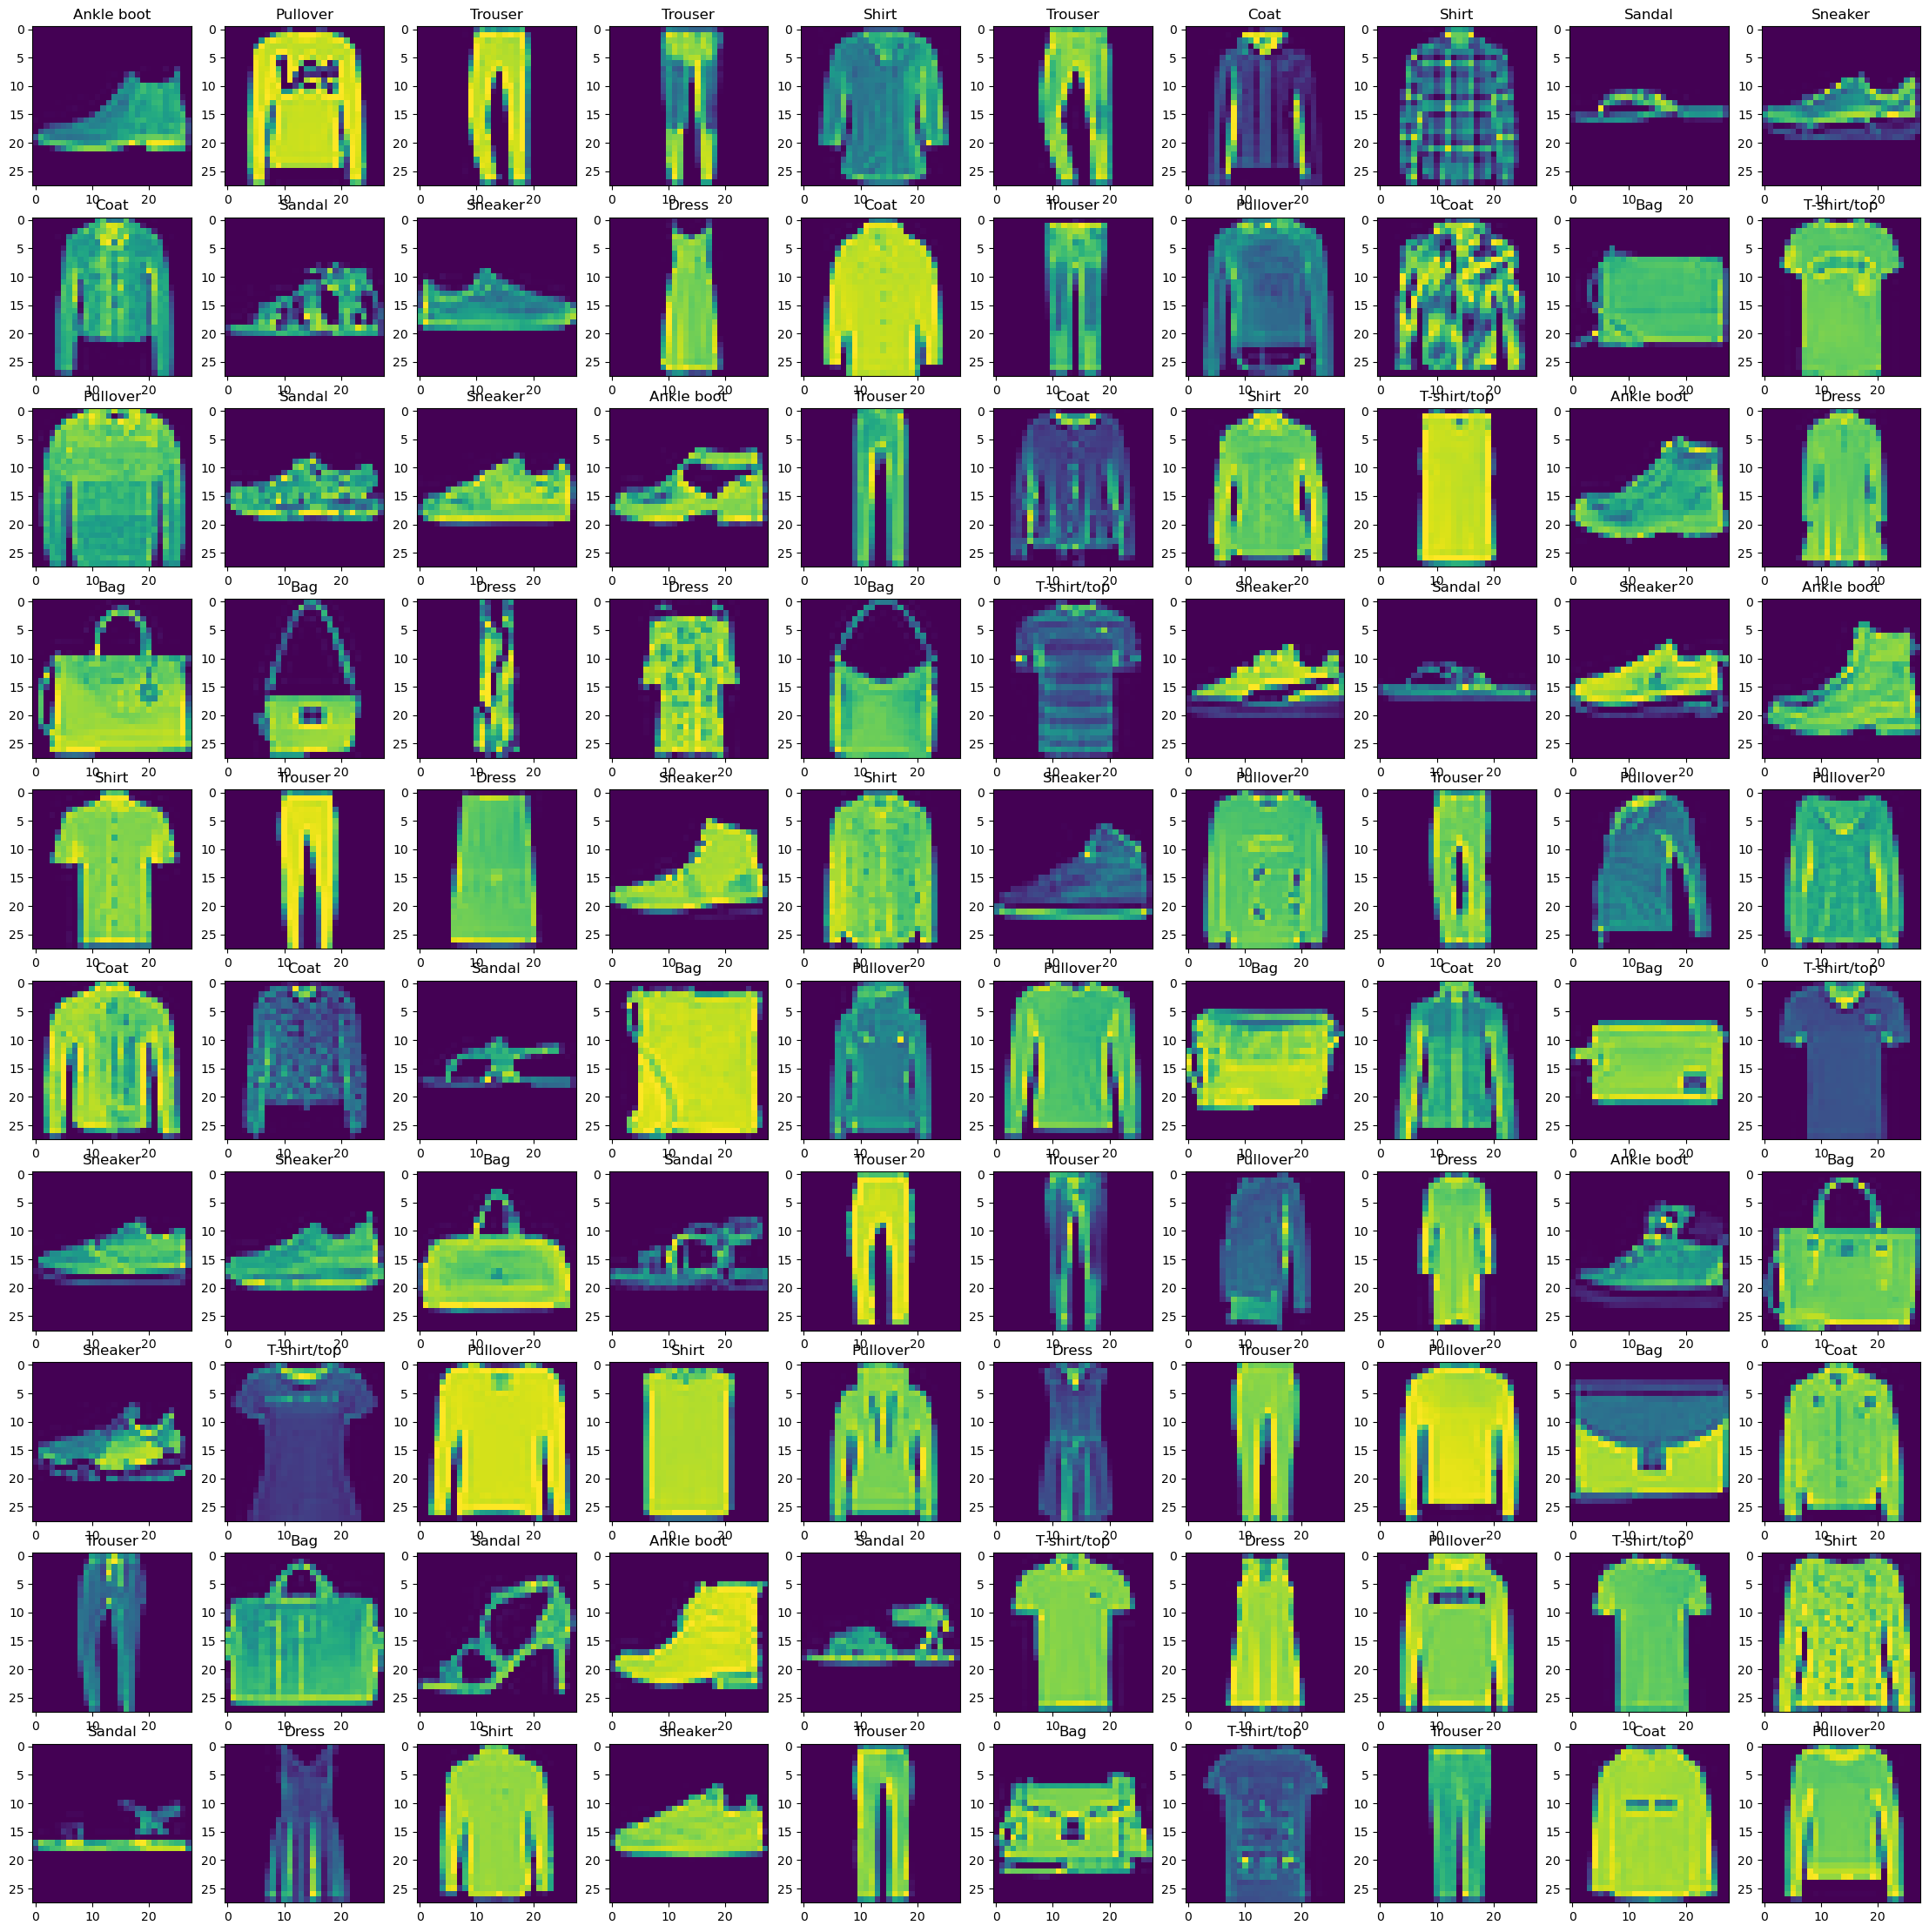

In [10]:
fig, ax = plt.subplots(10, 10, figsize=(28,28))
ax = ax.flatten()

print("Test Images:")

for i in range(0, 100):
        img = test_images[i]
        if img is None:
            continue
            
        label = class_names[test_labels[i]]
        ax[i].imshow(img)
        ax[i].set_title(label)

Then we will check the value range in the first test image in each set:

These images are stored as 0-255 grayscales and need to be normalized into floats in the 0.0-1.0 range.

Before setting up the neural net, it is now time to preprocess our images for feature extraction, with each range being set to a 0-1.0 float.

In [11]:
from keras.utils import to_categorical

train_images = train_images / 255.0
test_images = test_images / 255.0

In [12]:
train_labels = to_categorical(train_labels)

In [13]:
test_labels = to_categorical(test_labels)

For all of our data, we will be using a simple network as per the tutorial at https://www.tensorflow.org/tutorials/keras/classification

In [14]:
from keras import layers
from tensorflow.keras.models import Sequential, Model

In [15]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [17]:
# Verify shape
train_images.shape, test_images.shape

((60000, 28, 28), (10000, 28, 28))

In [18]:
train_labels.shape, test_labels.shape

((60000, 10), (10000, 10))

In [19]:
# Train the model
model.fit(train_images,
                  train_labels,
                  epochs=10
                  )

Epoch 1/10


2024-05-01 18:41:31.876937: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


1875/1875 [==============================] - 11s 6ms/step - loss: 0.5470 - accuracy: 0.8098
Epoch 2/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.4688 - accuracy: 0.8375
Epoch 3/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.4640 - accuracy: 0.8406
Epoch 4/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.4666 - accuracy: 0.8402
Epoch 5/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.4655 - accuracy: 0.8414
Epoch 6/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.4744 - accuracy: 0.8403
Epoch 7/10
1875/1875 [==============================] - 10s 6ms/step - loss: 0.4769 - accuracy: 0.8402
Epoch 8/10
1875/1875 [==============================] - 10s 6ms/step - loss: 0.4803 - accuracy: 0.8396
Epoch 9/10
1875/1875 [==============================] - 10s 6ms/step - loss: 0.4881 - accuracy: 0.8393
Epoch 10/10
1875/1875 [==============================] - 10s 6ms/step - loss: 0.5055

In [20]:
# Evaluate model accuracy
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
print('Test accuracy:', test_acc)

313/313 - 2s - loss: 0.5878 - accuracy: 0.8200 - 2s/epoch - 5ms/step
Test accuracy: 0.8199999928474426


Training and testing predictions will now be made on the preprocessed data using ResNet50V2. Trained data will then be saved for future use.

In [21]:
model.fit(train_images,
                  train_labels,
                  epochs=20
         )

Epoch 1/20
1875/1875 [==============================] - 10s 6ms/step - loss: 0.5048 - accuracy: 0.8364
Epoch 2/20
1875/1875 [==============================] - 11s 6ms/step - loss: 0.5146 - accuracy: 0.8357
Epoch 3/20
1875/1875 [==============================] - 11s 6ms/step - loss: 0.5220 - accuracy: 0.8345
Epoch 4/20
1875/1875 [==============================] - 11s 6ms/step - loss: 0.5316 - accuracy: 0.8339
Epoch 5/20
1875/1875 [==============================] - 12s 6ms/step - loss: 0.5408 - accuracy: 0.8320
Epoch 6/20
1875/1875 [==============================] - 11s 6ms/step - loss: 0.5459 - accuracy: 0.8325
Epoch 7/20
1875/1875 [==============================] - 11s 6ms/step - loss: 0.5563 - accuracy: 0.8311
Epoch 8/20
1875/1875 [==============================] - 11s 6ms/step - loss: 0.5694 - accuracy: 0.8329
Epoch 9/20
1875/1875 [==============================] - 11s 6ms/step - loss: 0.5793 - accuracy: 0.8307
Epoch 10/20
1875/1875 [==============================] - 11s 6ms/step - l

In [22]:
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])

In [23]:
# Extraction stage
train_features = model.predict(np.array(train_images), batch_size=BATCH_SIZE, verbose=1)
test_features = model.predict(np.array(test_images), batch_size=BATCH_SIZE, verbose=1)

# Feature saving stage
np.savez("train_features", train_features, train_labels)
np.savez("test_features", test_features, test_labels)

10/10 [==============================] - 0s 3ms/step


It is now time to load a set of real-world use case images for classification and further processing.

In [24]:
import skimage 
from skimage import data
from skimage.filters.rank import equalize
import skimage.filters as skfilters
import skimage.morphology as morphology
import skimage.transform as transform
from skimage.color import rgb2gray, gray2rgb
from skimage import exposure
from PIL import Image
import numpy as np
import math
import matplotlib.pyplot as plt
import os
%matplotlib inline

In [25]:
def plot_grayscale(img, h=8, axis='off'):
    plt.figure(figsize=(h, h))
    _=plt.imshow(img, cmap=plt.get_cmap('gray'))
    _=plt.axis(axis);

In [26]:
def predict_piece(image_url):
    img_np = np.asarray(Image.open(image_url))
    
    print('The image object is ' + str(type(img_np)))
    print('The pixel values are of type ' + str(type(img_np[0,0,0])))
    print('Shape of image object = ' + str(img_np.shape))
    fig, ax = plt.subplots( figsize=(6, 6))
    _=ax.imshow(img_np)
    
    img_name = os.path.splitext(os.path.basename(image_url))[0]
    img_path = tf.keras.utils.get_file(img_name,
                                       origin='file://' + os.path.abspath(image_url))

    img = tf.keras.utils.load_img(
        img_path, target_size=(img_np.shape[1], img_np.shape[0])
    ).resize((28,28))
    
    grayscale = gray2rgb(rgb2gray(img))
    grayscale = exposure.equalize_adapthist(grayscale)
    
    plot_grayscale(grayscale)
    
    img_array = tf.expand_dims(grayscale, 0) # Create a batch of a single image
    print(img_array.shape)
    
    predictions = probability_model.predict(img_array)
    print(predictions.shape)
    
    class_id = np.argmax(predictions, axis = 1)
    print("CLASS ID: {}".format(class_id))

    score = predictions[0][class_id]

    print("argmax {}".format(np.argmax(score)))
    print(
        "This piece is most likely a {} with a {:.2f} percent confidence."
        .format(class_names[class_id[0]], 100 * np.max(score))
    )

The image object is <class 'numpy.ndarray'>
The pixel values are of type <class 'numpy.uint8'>
Shape of image object = (4032, 3024, 3)
(1, 28, 28, 3)


ValueError: in user code:

    File "/Users/alonzomachiraju/anaconda3/lib/python3.11/site-packages/keras/engine/training.py", line 2169, in predict_function  *
        return step_function(self, iterator)
    File "/Users/alonzomachiraju/anaconda3/lib/python3.11/site-packages/keras/engine/training.py", line 2155, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/Users/alonzomachiraju/anaconda3/lib/python3.11/site-packages/keras/engine/training.py", line 2143, in run_step  **
        outputs = model.predict_step(data)
    File "/Users/alonzomachiraju/anaconda3/lib/python3.11/site-packages/keras/engine/training.py", line 2111, in predict_step
        return self(x, training=False)
    File "/Users/alonzomachiraju/anaconda3/lib/python3.11/site-packages/keras/utils/traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/Users/alonzomachiraju/anaconda3/lib/python3.11/site-packages/keras/engine/input_spec.py", line 280, in assert_input_compatibility
        raise ValueError(

    ValueError: Exception encountered when calling layer 'sequential' (type Sequential).
    
    Input 0 of layer "dense" is incompatible with the layer: expected axis -1 of input shape to have value 784, but received input with shape (None, 2352)
    
    Call arguments received by layer 'sequential' (type Sequential):
      • inputs=tf.Tensor(shape=(None, 28, 28, 3), dtype=float32)
      • training=False
      • mask=None


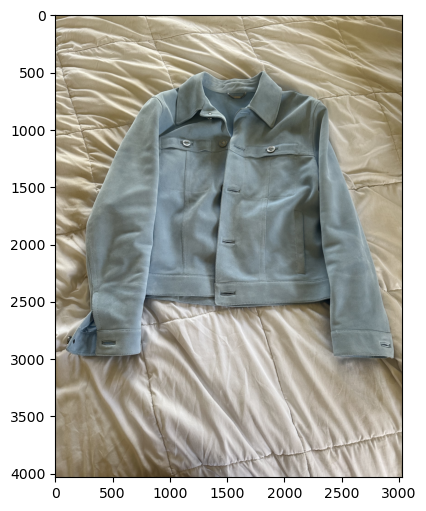

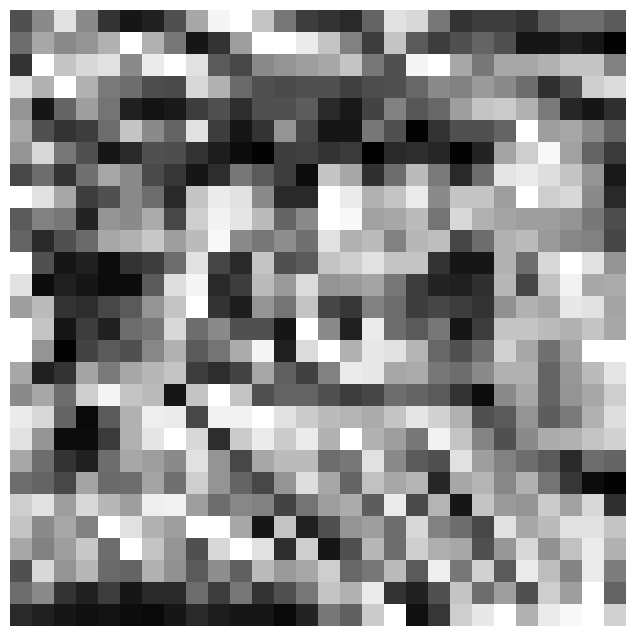

In [27]:
predict_piece('images/blue_jacket.png')

In [ ]:
predict_piece('images/black_highlight_dress.png')

In [ ]:
predict_piece('images/red_pants.png')

In [ ]:
predict_piece('images/button_shorts.png')

In [ ]:
predict_piece('images/combat_boots.png')

In [ ]:
predict_piece('images/vino_hoodie.png')